<a href="https://colab.research.google.com/github/corinnakeum1/DS-4002/blob/main/API_assignmet_CorinnaKeum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np # Import the numpy package into your workspace
import matplotlib.pyplot as plt # Import matplotlib into your workspace
import pandas as pd  # Import the pandas package into your workspace


In [62]:
import urllib.request
import json
url = 'https://www.saferproducts.gov/RestWebServices/'
query = 'Recall?format=json&ProductType=Sunglass'
response = urllib.request.urlopen(url+query)
response_bytes = response.read()
data = json.loads(response_bytes)
response.close()

1. Practice writing queries using the saferproducts.gov API and your web browser.

?format=json&ProductType=sunglass

?format=json&Injury=Death


3. Convert this code chunk into a function you can reuse to flatten dictionaries, or explain clearly the problems you run into while attempting to do so. Make some tables or plots.

(8, 22) 

RecallID                  int64
RecallNumber             object
RecallDate               object
Description              object
URL                      object
Title                    object
ConsumerContact          object
LastPublishDate          object
Products                 object
Inconjunctions           object
Images                   object
Injuries                 object
Manufacturers            object
Retailers                object
Importers                object
Distributors             object
SoldAtLabel              object
ManufacturerCountries    object
ProductUPCs              object
Hazards                  object
Remedies                 object
RemedyOptions            object
dtype: object 

Index(['RecallID', 'RecallNumber', 'RecallDate', 'Description', 'URL', 'Title',
       'ConsumerContact', 'LastPublishDate', 'Products', 'Inconjunctions',
       'Images', 'Injuries', 'Manufacturers', 'Retailers', 'Importers',
       'Distributors', 'SoldAtLabel', 'Manu

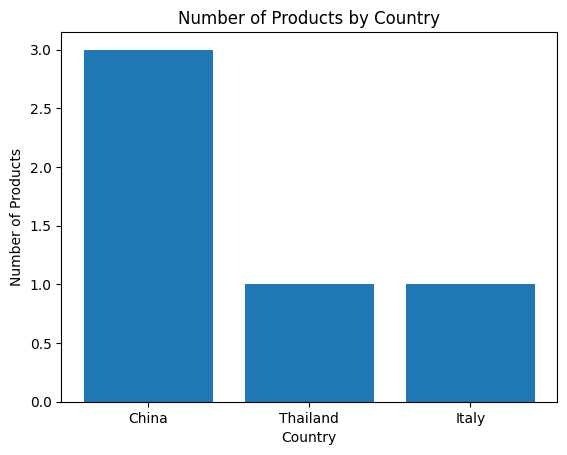

In [63]:
df = pd.DataFrame.from_dict(data) # converts to dataframe

print(df.shape, '\n') # List the dimensions of df
print(df.dtypes, '\n') # The types of the variables; `object` is a bad sign
print(df.columns, '\n') # Column names
df.head()
print(df.head())

temp = df['RemedyOptions'] # opening remedyoptions in the data frame
clean_values = [] # making an empty list
for i in range(len(temp)): #loop through the temp column
    if isinstance(temp[i], list) and len(temp[i]) > 0:  # Check that the variable is not empty in list
        values = [] # make a new list
        for j in range(len(temp[i])): # loop through the temp item
            if isinstance(temp[i][j], dict) and 'Option' in temp[i][j]:  # Check if it's a dictionary and contains option
                values.append(temp[i][j]['Option']) # adding to the list
        clean_values.append(values)
    else:
        clean_values.append('')
df['remedy'] = clean_values


df.head() # table of data frame


print(df['ManufacturerCountries'])

data = {'ManufacturerCountries': [[{'Country': 'China'}], [{'Country': 'Thailand'}], [{'Country': 'Italy'}], [{'Country': 'China'}], [{'Country': 'China'}]]}
df = pd.DataFrame(data)


countries = [] # make a list to put the countries into
for country_list in df['ManufacturerCountries']: # for the amount of countries in the DF
  for country_dict in country_list:
    countries.append(country_dict['Country'])
# countries put into the new list


# counting the amount of times the country is seen
country_counts = pd.Series(countries).value_counts()

# creating a bar graph
plt.bar(country_counts.index, country_counts.values)
plt.xlabel("Country")
plt.ylabel("Number of Products")
plt.title("Number of Products by Country")
plt.show()


5. Pick an API, download some data, wrangle them, and produce some EDA results, as we did in the previous steps with the saferproducts.gov API; or, if you can't get it to work, document why. If you have the time and it's low cost, push the results to a streamlit page. If you have had enough, I recommend https://www.eia.gov/opendata/browser/electricity, since there is a friendly query builder that you can use to learn.

In [66]:
import urllib.request
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt

url = 'https://www.saferproducts.gov/RestWebServices/'
query = 'Recall?format=json&Injury=Death'
response = urllib.request.urlopen(url+query)
response_bytes = response.read()
data = json.loads(response_bytes)
response.close()

temp = df['RemedyOptions'] # opening remedyoptions in the data frame
clean_values = [] # making an empty list
for i in range(len(temp)): #loop through the temp column
    if isinstance(temp[i], list) and len(temp[i]) > 0:  # Check that the variable is not empty in list
        values = [] # make a new list
        for j in range(len(temp[i])): # loop through the temp item
            if isinstance(temp[i][j], dict) and 'Option' in temp[i][j]:  # Check if it's a dictionary and contains option
                values.append(temp[i][j]['Option']) # adding to the list
        clean_values.append(values)
    else:
        clean_values.append('')
df['remedy'] = clean_values

#defining the data frame
df = pd.DataFrame.from_dict(data)
print(df.shape)
print(df.head())

print(df['ManufacturerCountries'])

data = {'ManufacturerCountries': [[{'Country': 'China'}], [{'Country': 'Thailand'}], [{'Country': 'Italy'}], [{'Country': 'China'}], [{'Country': 'China'}]]}
df = pd.DataFrame(data)


countries = [] # make a list to put the countries into
for country_list in df['ManufacturerCountries']: # for the amount of countries in the DF
  for country_dict in country_list:
    countries.append(country_dict['Country'])
# countries put into the new list


# counting the amount of times the country is seen
country_counts = pd.Series(countries).value_counts()

# creating a bar graph
plt.bar(country_counts.index, country_counts.values)
plt.xlabel("Country")
plt.ylabel("Number of Products")
plt.title("Number of Products by Country")
plt.show()


KeyError: 'RemedyOptions'